# Modeling - K Nearest Neighbors
Using Interacted Features

### Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import _pickle as pickle

In [2]:
with open("inter_df.pkl", "rb") as fp:
    df = pickle.load(fp)

## Preparing the Data

### Train, test, split

In [3]:
X = df[[i for i in df.columns if i != "Decision"]]
y = df.Decision

# Train, test, split
X_train, X_test, y_train, y_test = train_test_split(X, y)

### Functions

In [4]:
def plot_confusion_matrix(y_true, y_pred, labels=["Sell", "Buy", "Hold"], 
                          normalize=False, title=None, cmap=plt.cm.cividis):

    cm = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(12,6))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=labels, yticklabels=labels,
           title=title,
           ylabel='ACTUAL',
           xlabel='PREDICTED')
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="crimson" if cm[i, j] > thresh else "crimson",
                    size=26)
    ax.grid(False)
    fig.tight_layout()
    return ax

In [5]:
def mod_results(clf, X_train, X_test, y_train, y_test):
    """
    Displays the results of a fitted model with a Confusion Matrix
    """
    # Getting predictions for the training set
    train_preds = clf.predict(X_train)

    # Getting predictions for the testing set
    test_preds = clf.predict(X_test)

    # Scores for both predictions
    train_score = accuracy_score(y_train, train_preds)
    test_score = accuracy_score(y_test, test_preds)

    # Printing Results
    print(f"Training Accuracy: {train_score} \t\t Testing Accuracy: {test_score}")
    
    # Displaying Confusion Matrix
    plot_confusion_matrix(y_test, test_preds, title="Confusion Matrix")
    np.set_printoptions(precision=1)
    
    # Plot non-normalized confusion matrix
    plt.show()

## PCA

In [7]:
from sklearn.decomposition import PCA

# Instatiating
pca = PCA()

# Fitting PCA
X_pca = pca.fit(X_train)

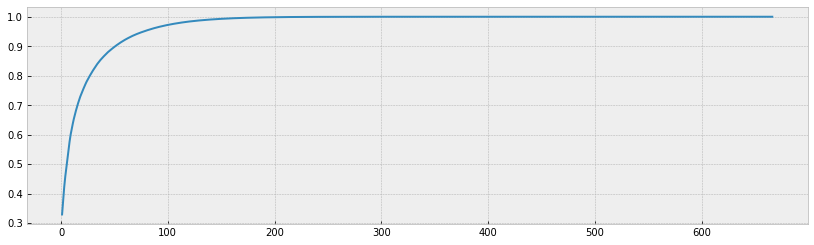

Number features: 77	Total Variance Explained: 0.9508349217673331


In [8]:
plt.style.use("bmh")
plt.figure(figsize=(14,4))
plt.plot(range(1,X_train.shape[1]+1), X_pca.explained_variance_ratio_.cumsum())
plt.show()

total_explained_variance = X_pca.explained_variance_ratio_.cumsum()
n_over_95 = len(total_explained_variance[total_explained_variance>.95])
n_to_reach_95 = X.shape[1] - n_over_95

print(f"Number features: {n_to_reach_95}\tTotal Variance Explained: {total_explained_variance[n_to_reach_95]}")

In [9]:
# Implementing the reduced number of features
pca = PCA(n_components=n_to_reach_95)

X_pca_train = pca.fit_transform(X_train)
X_pca_test = pca.transform(X_test)

pca.explained_variance_ratio_.cumsum()[-1]

0.949381966360504

## KNN Modeling

In [10]:
from sklearn.neighbors import KNeighborsClassifier

# Instatiating the model classifier
k_clf = KNeighborsClassifier(n_neighbors=200)

# Fitting the model
k_clf.fit(X_pca_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=200, p=2,
           weights='uniform')

K Nearest Neighbors
Training Accuracy: 0.4379238133226965 		 Testing Accuracy: 0.43419084654501944


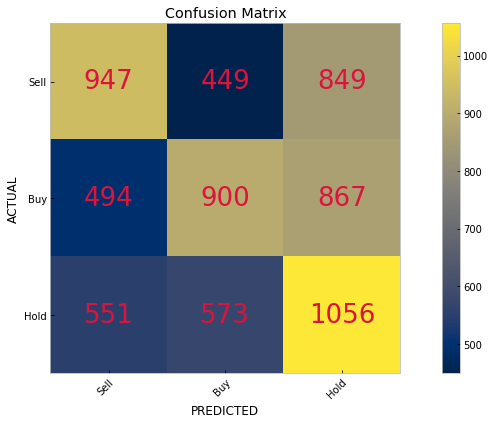

In [11]:
# Printing Results
print("K Nearest Neighbors")
mod_results(k_clf, X_pca_train, X_pca_test, y_train, y_test)

## KNN - Results
with PCA, scaled and interacted features

In [23]:
# K Nearest Neighbors
# Training Accuracy: 0.4379238133226965 		 Testing Accuracy: 0.43419084654501944